# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

1. Clean the data and perform some EDA and visualization to get to know the data set.

In [4]:
from google.colab import files
uploaded = files.upload()

Saving cars_hw.csv to cars_hw.csv


In [57]:
cars = pd.read_csv('cars_hw.csv')
cars.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [58]:
cars.describe()

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price
count,976.000000,976.000000,976.000000,976.000000,9.760000e+02
mean,488.500000,2016.963115,41571.195697,5.095287,7.410195e+05
std,281.891232,2.818742,24390.995134,0.446224,3.673234e+05
min,1.000000,2011.000000,1117.000000,4.000000,1.880000e+05
25%,244.750000,2015.000000,22676.750000,5.000000,4.757500e+05
50%,488.500000,2017.000000,37570.500000,5.000000,6.665000e+05
75%,732.250000,2019.000000,57421.250000,5.000000,8.830000e+05
max,976.000000,2022.000000,99495.000000,8.000000,2.941000e+06


In [59]:
cars.info() #checking if theres any missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB


In [60]:
cars['Make'].unique()

array(['Volkswagen', 'Hyundai', 'Honda', 'Renault', 'Tata', 'Chevrolet',
       'Maruti Suzuki', 'Toyota', 'Mahindra', 'Ford', 'Nissan', 'Jeep',
       'MG Motors', 'Kia', 'Skoda', 'Datsun'], dtype=object)

2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [61]:
cars['No_of_Owners'].unique()

array(['1st', '2nd', '3rd'], dtype=object)

In [62]:
cars['No_of_Owners'] = cars['No_of_Owners'].replace({'1st': 1, '2nd': 2, '3rd': 3}, inplace=False)

<ipython-input-62-10c45023fafd>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars['No_of_Owners'] = cars['No_of_Owners'].replace({'1st': 1, '2nd': 2, '3rd': 3}, inplace=False)


In [63]:
cars['Make_Year'].unique()

array([2017, 2016, 2019, 2012, 2021, 2020, 2013, 2022, 2018, 2014, 2011,
       2015])

In [64]:
cars['Make_Year'] = pd.to_numeric(cars['Make_Year'])

In [65]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    int64 
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 91.6+ KB


In [66]:
cars['Transmission_Type'].unique()

array(['Automatic', 'Manual'], dtype=object)

In [67]:
cars['Transmission_Type'] = cars['Transmission_Type'].replace({'Manual': 0, 'Automatic': 1}, inplace=False)

<ipython-input-67-ca1a83387f8b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars['Transmission_Type'] = cars['Transmission_Type'].replace({'Manual': 0, 'Automatic': 1}, inplace=False)


In [40]:
cars['Fuel_Type'].unique()

array(['diesel', 'petrol', 'petrol+cng'], dtype=object)

In [74]:
cars['Fuel_Type'] = cars['Fuel_Type'].replace({'diesel': 0, 'petrol': 1, 'petrol+cng': 2}, inplace=False)

<ipython-input-74-cd94f7158bba>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars['Fuel_Type'] = cars['Fuel_Type'].replace({'diesel': 0, 'petrol': 1, 'petrol+cng': 2}, inplace=False)


In [41]:
cars['Transmission'].unique()

array(['7-Speed', '5-Speed', '6-Speed', 'CVT', '4-Speed'], dtype=object)

In [69]:
cars['Transmission'] = cars['Transmission'].replace({'7-Speed': 7, '5-Speed': 5, '6-Speed':6, 'CVT': 0, '4-Speed':4}, inplace=False)

<ipython-input-69-bacd8e40db12>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars['Transmission'] = cars['Transmission'].replace({'7-Speed': 7, '5-Speed': 5, '6-Speed':6, 'CVT': 0, '4-Speed':4}, inplace=False)


In [70]:
cars['Make'].unique()

array(['Volkswagen', 'Hyundai', 'Honda', 'Renault', 'Tata', 'Chevrolet',
       'Maruti Suzuki', 'Toyota', 'Mahindra', 'Ford', 'Nissan', 'Jeep',
       'MG Motors', 'Kia', 'Skoda', 'Datsun'], dtype=object)

In [72]:
makes_code = {'Volkswagen': 1, 'Hyundai': 2, 'Honda':3, 'Renault': 4, 'Tata': 5, 'Chevrolet': 6, 'Maruti Suzuki': 7, 'Toyota': 8, 'Mahindra': 9, 'Ford': 10, 'Nissan': 11, 'Jeep': 12, 'MG Motors': 13, 'Kia': 14, 'Skoda': 15, 'Datsun': 16}
cars['Make'] = cars['Make'].replace(makes_code)

<ipython-input-72-020c0594b700>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars['Make'] = cars['Make'].replace(makes_code)


In [75]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    int64 
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    int64 
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    int64 
 9   Transmission       976 non-null    int64 
 10  Transmission_Type  976 non-null    int64 
 11  Price              976 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 91.6+ KB


In [76]:
cars['Color'].unique()

array(['silver', 'red', 'white', 'bronze', 'orange', 'grey', 'blue',
       'yellow', 'beige', 'brown', 'golden', 'black', 'maroon', 'purple',
       'green'], dtype=object)

In [78]:
cars['Body_Type'].unique()

array(['sedan', 'crossover', 'suv', 'hatchback', 'muv'], dtype=object)

In [79]:
cars['Body_Type'] = cars['Body_Type'].replace({'sedan': 0, 'crossover': 1, 'suv': 2, 'hatchback': 3, 'muv':4}, inplace = False)

<ipython-input-79-089ee259be48>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars['Body_Type'] = cars['Body_Type'].replace({'sedan': 0, 'crossover': 1, 'suv': 2, 'hatchback': 3, 'muv':4}, inplace = False)


In [81]:
new_cars = cars.drop('Color', axis=1) # i am not dealing with color

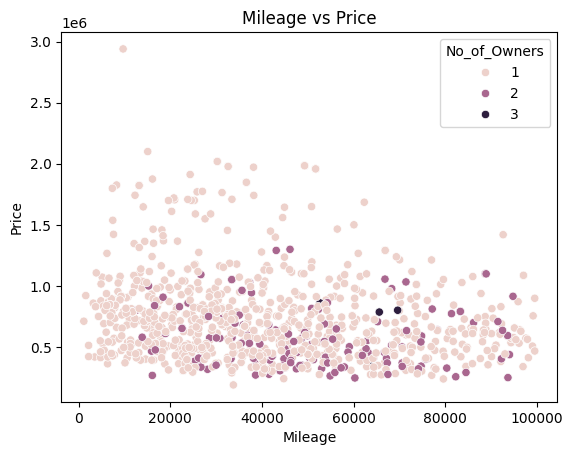

In [82]:
sns.scatterplot(data = new_cars, x='Mileage_Run', y='Price', hue='No_of_Owners')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.show()

3. Implement an 80/20 train-test split. Put the test data aside.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(new_cars.iloc[:, 0:10], new_cars['Price'], test_size=0.2, random_state=42)

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [86]:
def slr(x,y): #Ordinary Least Squares method
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

In [88]:
trained_slr = slr(X_train['Mileage_Run'], y_train) # fitting the model

In [89]:
b0 = trained_slr['b0']
b1 = trained_slr['b1']
y_test_pred = b0 + b1 * X_test['Mileage_Run'] #finding variables will need fro the RMSE and R^2

In [ ]:
y_train_rmse = np.sqrt()